In [1]:
import numpy as np
import h5py as h5
import sys
import time
import matplotlib.pyplot as plt 


In [2]:
# -- visit function for h5 viewing the structure of files
def visit_func(name, node):
    '''
    Return all groups and datasets name and shapes of h5 file called name
    '''
    if isinstance(node, h5.Group):
        print(node.name)
    elif isinstance(node, h5.Dataset):
        if (node.dtype == 'object') :
            print (node.name, 'is an object Dataset')
        else:
            print('\t', node.name, node.shape)
    else:
        print(node.name, 'is an unknown type')

# Define functions
def reconstruct_img(photons_i, photons_j, shape):
    nx, ny = shape
    phot_img, _,_ = np.histogram2d(photons_j+0.5, photons_i+0.5, bins=[np.arange(nx+1),np.arange(ny+1)])                         
    return phot_img

        
def assemble_image(imgs):
    """
    return the assembled image of size [2080,2080]
    with the 4 epix
    input: list of 4 epix map
    output: map of size (2080,2080) assembled
    """
    shape = [704,768]
    edge  = [170,140]
    frame = np.zeros([2080,2080])
    #epix1
    frame[  edge[0]:shape[0]+edge[0],  edge[1]:shape[1]+edge[1]] = np.rot90( imgs[0] , 2)
    #epix2
    frame[  edge[0]:shape[0]+edge[0],-edge[1]-shape[1]:-edge[1]] = np.rot90( imgs[1] , 2)
    #epix3
    frame[-edge[0]-shape[0]:-edge[0],  edge[1]:shape[1]+edge[1]] = imgs[2]
    #epix4
    frame[-edge[0]-shape[0]:-edge[0],-edge[1]-shape[1]:-edge[1]] =  imgs[3] 
    return frame

In [3]:
ls /sdf/data/lcls/ds/xpp/xppl1001021/hdf5/smalldata

cube/                   xppl1001021_Run0036.h5  xppl1001021_Run0055.h5
jungfrau/               xppl1001021_Run0037.h5  xppl1001021_Run0056.h5
xppl1001021_Run0002.h5  xppl1001021_Run0038.h5  xppl1001021_Run0057.h5
xppl1001021_Run0003.h5  xppl1001021_Run0039.h5  xppl1001021_Run0058.h5
xppl1001021_Run0004.h5  xppl1001021_Run0040.h5  xppl1001021_Run0059.h5
xppl1001021_Run0005.h5  xppl1001021_Run0041.h5  xppl1001021_Run0060.h5
xppl1001021_Run0009.h5  xppl1001021_Run0042.h5  xppl1001021_Run0061.h5
xppl1001021_Run0010.h5  xppl1001021_Run0043.h5  xppl1001021_Run0062.h5
xppl1001021_Run0011.h5  xppl1001021_Run0044.h5  xppl1001021_Run0063.h5
xppl1001021_Run0012.h5  xppl1001021_Run0045.h5  xppl1001021_Run0064.h5
xppl1001021_Run0014.h5  xppl1001021_Run0046.h5  xppl1001021_Run0065.h5
xppl1001021_Run0015.h5  xppl1001021_Run0047.h5  xppl1001021_Run0066.h5
xppl1001021_Run0024.h5  xppl1001021_Run0048.h5  xppl1001021_Run0067.h5
xppl1001021_Run0029.h5  xppl1001021_Run0049.h5  xppl1001021_Run0068.h5
xppl10

In [4]:

exp_name = 'xppl1001021'
run_num=47
output_path = '/sdf/data/lcls/ds/xpp/{}/results/output/'.format(exp_name)


smalldata_path = '/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/'.format(exp_name)
#smalldata_path = '/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/shared/'.format(exp_name)


In [5]:
with h5.File(smalldata_path + '{}_Run{:04d}.h5'.format(exp_name, run_num),'r') as f:
    print(f.keys())

    f['epix_alc5'].visititems(visit_func)
    
    #mask = f['UserDataCfg/epix_alc{}/mask'.format(epix)][()]#this is the general mask we use for photonization    


<KeysViewHDF5 ['Sums', 'UserDataCfg', 'adc', 'ai', 'damage', 'diode2', 'diodeU', 'ebeam', 'epics', 'epicsAll', 'epix_alc1', 'epix_alc1_env', 'epix_alc2', 'epix_alc2_env', 'epix_alc3', 'epix_alc3_env', 'epix_alc4', 'epix_alc4_env', 'epix_alc5', 'epix_alc5_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'gas_detector', 'ipm2', 'ipm_hx2', 'jungfrau1M_alcove', 'lightStatus', 'lombpm', 'lomdiode', 'scan']>
/epix_alc5/ragged_droplet_photon_i is an object Dataset
/epix_alc5/ragged_droplet_photon_j is an object Dataset
/epix_alc5/ragged_droplet_prob_0 is an object Dataset


In [7]:
total_mask[0][0:10,0:10]

NameError: name 'total_mask' is not defined

In [12]:
mask=[[],[],[],[]]
N_epix=4

mask[0]=np.ones([704,768 ])
mask[1]=np.ones([704,768])
mask[2]=np.ones([704,768])
mask[3]=np.ones([704,768])

mask[0][0:354,370:390]=0
mask[0][0:154,680:710]=0

mask[1][350:,635]=0
mask[1][350:,636]=0
mask[1][350:,637]=0
mask[3][507:509,477:479]=0

pixel_out=8
pixel_center1=383
pixel_center2=352
deltapixel=3

for epix in range(N_epix):
    mask[epix][0:pixel_out,:]=0
    mask[epix][:,0:pixel_out]=0
    mask[epix][-pixel_out:,:]=0
    mask[epix][:,-pixel_out:]=0
    
    mask[epix][:,pixel_center1-deltapixel:pixel_center1+deltapixel]=0
    mask[epix][pixel_center2-deltapixel:pixel_center2+deltapixel,:]=0
    

with h5.File(smalldata_path + '{}_Run{:04d}.h5'.format(exp_name, run_num),'r') as f:
    print(f.keys())
    photons_i = []
    photons_j = []
    
    total_mask = []#this is the general mask we use for photonization
    
    for epix in range(N_epix):
        print(epix+1)
        photons_j.append( f['epix_alc{}/ragged_droplet_photon_j'.format(epix+1)][:])
        photons_i.append( f['epix_alc{}/ragged_droplet_photon_i'.format(epix+1)][:])
        m=f['UserDataCfg/epix_alc{}/mask'.format(epix+1)][()].astype(bool)
        total_mask.append(m*mask[epix])
        # Load all the masks


shape = m.shape
nframe = int(len(photons_i[0]))
    

<KeysViewHDF5 ['Sums', 'UserDataCfg', 'adc', 'ai', 'damage', 'diode2', 'diodeU', 'ebeam', 'epics', 'epicsAll', 'epix_alc1', 'epix_alc1_env', 'epix_alc2', 'epix_alc2_env', 'epix_alc3', 'epix_alc3_env', 'epix_alc4', 'epix_alc4_env', 'epix_alc5', 'epix_alc5_env', 'event_time', 'evr', 'feeBld', 'fiducials', 'gas_detector', 'ipm2', 'ipm_hx2', 'jungfrau1M_alcove', 'lightStatus', 'lombpm', 'lomdiode', 'scan']>
1
2
3
4


0.0
0.0
0.0
0.0


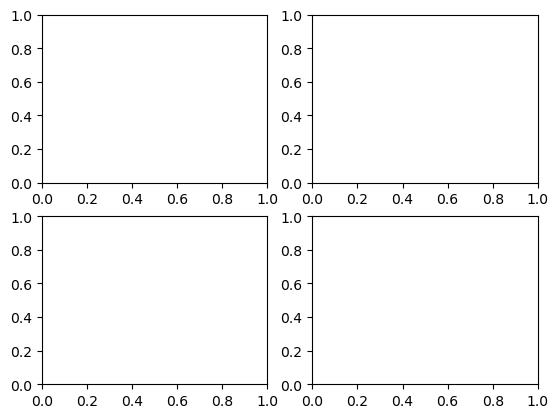

In [15]:
nframe_tot=1000
plt.figure()
imgs_reconstructed=[[],[],[],[],]
for epix in range(N_epix):
    plt.subplot(2,2,epix+1)
    for frame in range(nframe_tot):
        
        imgs_reconstructed[epix].append(reconstruct_img(photons_i[epix][frame], photons_j[epix][frame], shape))
        if frame / 1000 == 0.0:
            print(frame/nframe)
    
    #plt.imshow(imgs_reconstructed[epix],vmax=.001,vmin=0)

#plt.imshow(total_mask[epix],vmax=.001)



In [35]:
standardeviation_mask=np.std(imgs_reconstructed[0],axis=0)

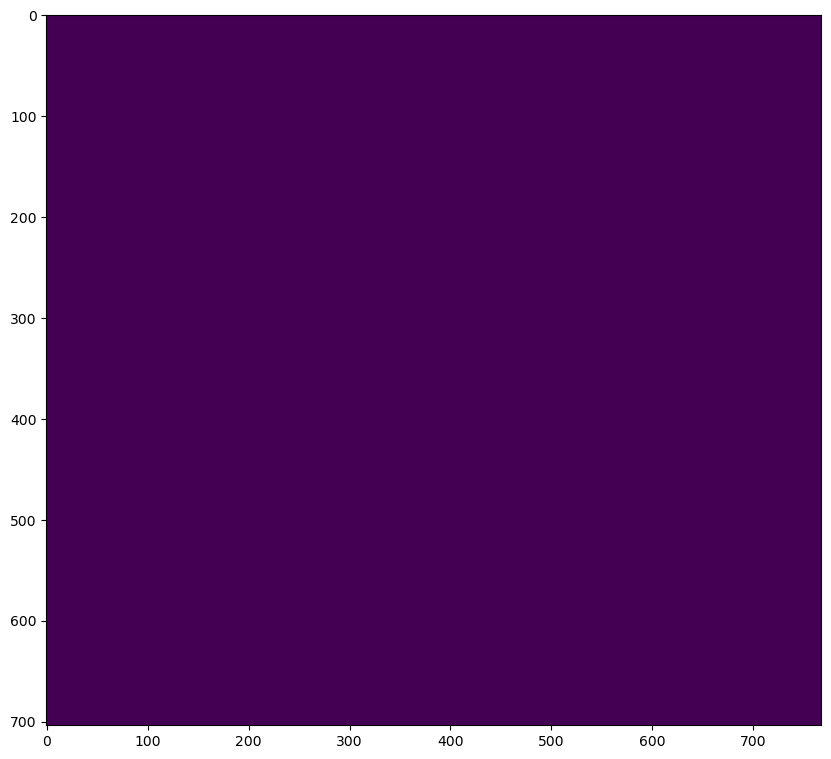

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(standardeviation_mask>.1,vmin=0,vmax=1)

In [29]:
standardeviation_mask>.1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

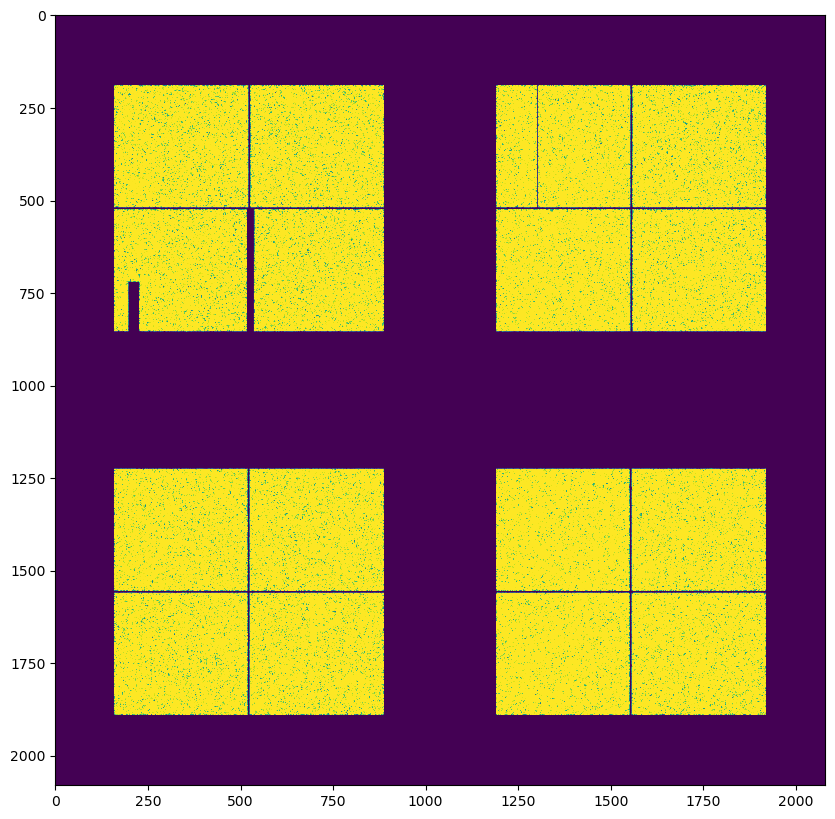

In [199]:
imgs=[]
for epix in range(N_epix):
    imgs.append(imgs_reconstructed[epix])


mask_4img=assemble_image(total_mask)
mask_4img=mask_4img.astype(bool)
plt.figure(figsize=(10,10))
plt.imshow(mask_4img*assemble_image(imgs),vmin=0,vmax=1)





In [200]:
import pyFAI


ai=pyFAI.load('/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/4epix_Lab6_231103.poni')

q,I=ai.integrate1d(assemble_image(imgs),200,mask=(~mask_4img))

Text(0.5, 0, '$q$')

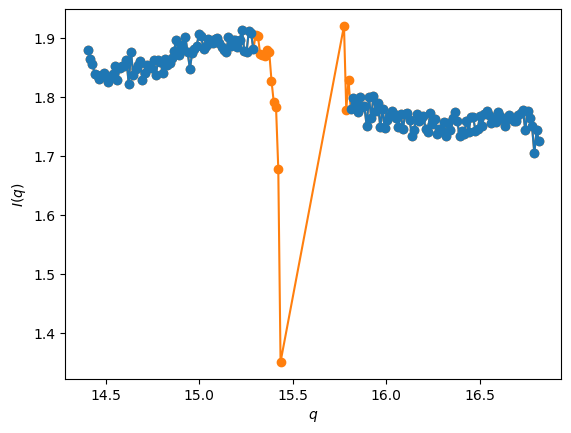

In [201]:
q0=15.3
q1=15.8
plt.figure()

plt.plot(q[(I>0)],I[(I>0)],marker='o',c='C1')
plt.plot(q[(I>0)&(q<q0)],I[(I>0)&(q<q0)],marker='o',c='C0')
plt.plot(q[(I>0)&(q>q1)],I[(I>0)&(q>q1)],marker='o',c='C0')

plt.ylabel('$I(q)$')
plt.xlabel('$q$')


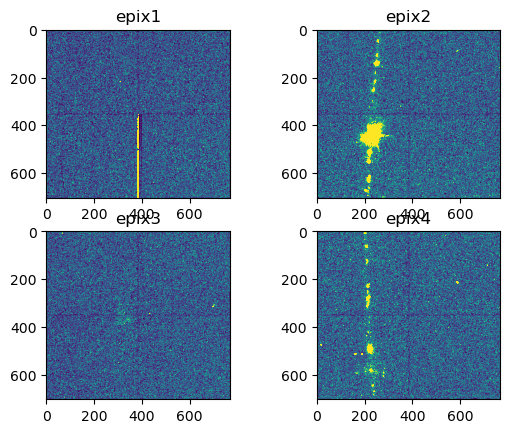

In [121]:
epix_order=[1,2,3,4]

det_img=np.zeros([4,imgs_reconstructed[epix].shape[0],imgs_reconstructed[epix].shape[1]])
i=0
for epix in range(N_epix):
    plt.subplot(2,2,epix_order[epix])
    plt.imshow(np.rot90(imgs_reconstructed[epix]*total_mask[epix],rotation[epix]),vmax=1,vmin=0)
    
    plt.title('epix'+str(epix+1))
    
    det_img[i,:,:]=imgs_reconstructed[epix]
    np.save(f'/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/det_img{i}.npy',det_img[i,:,:])
    i+=1

In [179]:
ls /sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/

4epix_Lab6_231103.poni   det_img1_Sibeee.npy      det_img4_Sibeee_new.npy
AhBh_asselmbles.npy      det_img2.npy             jungfrau.npy
det_img0.npy             det_img2_Sibeee_new.npy  jungfrau_run29.npy
det_img0_Sibeee_new.npy  det_img2_Sibeee.npy      jungfrau_run30.npy
det_img0_Sibeee.npy      det_img3.npy             jungfrau_run31.npy
det_img1.npy             det_img3_Sibeee_new.npy  Lab5_asselmbles.npy
det_img1_Sibeee_new.npy  det_img3_Sibeee.npy


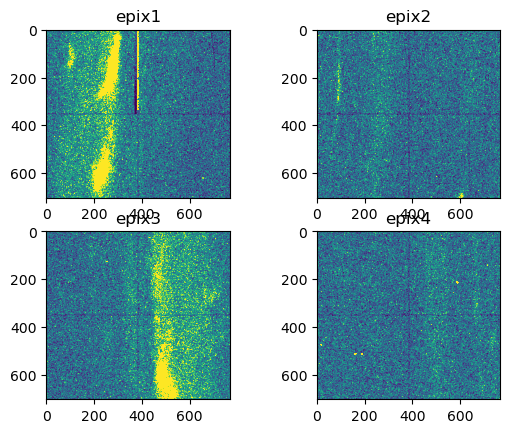

In [132]:
epix_order=[1,2,3,4]

#rotation=[0,0,0,0]

rotation=[-2,2,0,0]
for epix in range(N_epix):
    plt.subplot(2,2,epix_order[epix])
    img=np.load(f'/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/det_img{epix}_Sibeee.npy')
    plt.imshow(np.rot90(img,rotation[epix]),vmax=1,vmin=0)
    np.save(f'/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/det_img{epix}_Sibeee_new.npy',np.rot90(img,rotation[epix]))
    plt.title('epix'+str(epix+1))
    
    
    
    
    

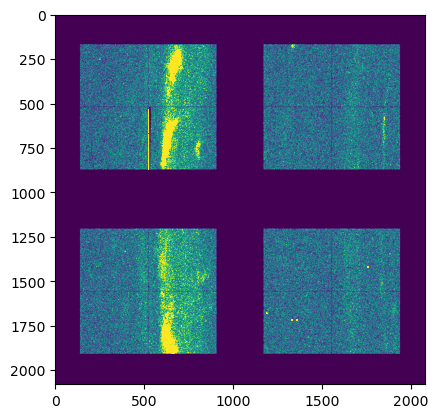

In [135]:
imgs=[]
for i in range(N_epix):
    imgs.append()

plt.figure()
plt.imshow(assemble_image(imgs),vmin=0,vmax=1)


(0.0, 1.0)

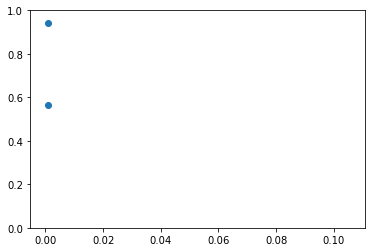

In [182]:
plt.figure()
plt.plot(kbar,beta,marker='o',ls='')
plt.ylim(0,1)

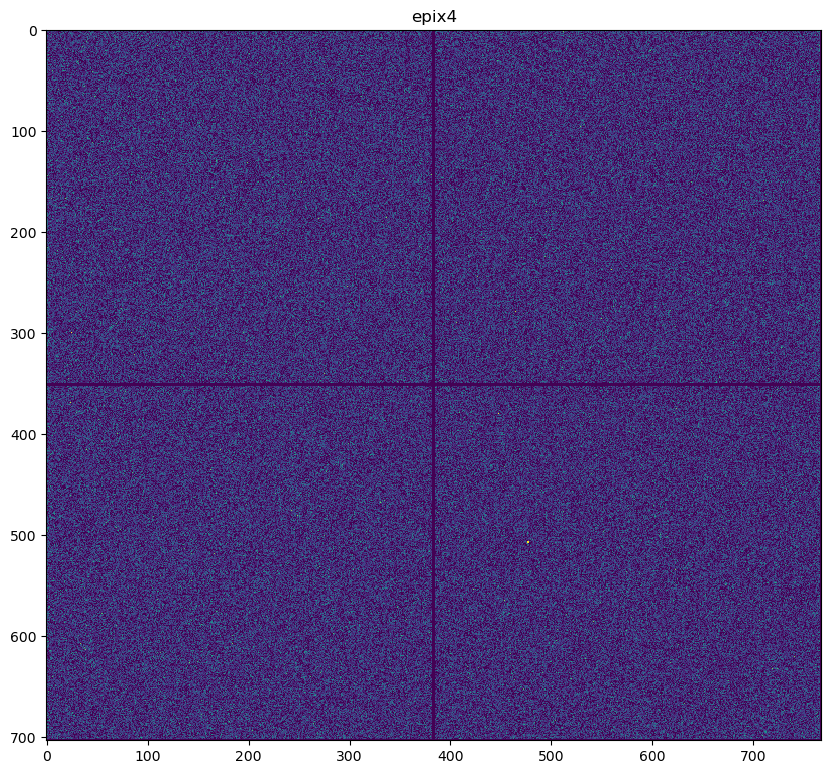

In [155]:


i=0
mask=[[],[],[],[]]
mask[0]=np.ones([m.shape[0],m.shape[1]])
mask[1]=np.ones([m.shape[0],m.shape[1]])
mask[2]=np.ones([m.shape[0],m.shape[1]])
mask[3]=np.ones([m.shape[0],m.shape[1]])

mask[0][0:350,370:384]=0
mask[0][0:154,680:710]=0


for epix in range(3,4):
    plt.figure(figsize=(10,10))
    #img=np.load(f'/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/det_img{epix}_Sibeee_new.npy')
    plt.imshow(imgs[epix]*mask[epix],vmax=10,vmin=0,interpolation='none')
    
    plt.title('epix'+str(epix+1))
    


    
    

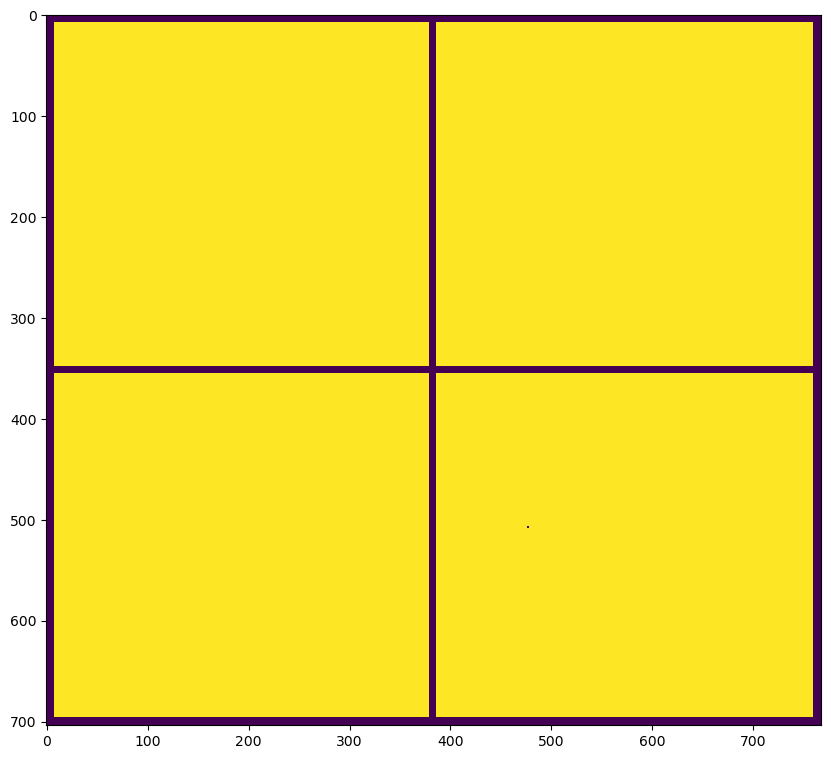

In [197]:
    plt.figure(figsize=(10,10))
    #img=np.load(f'/sdf/data/lcls/ds/xpp/xppl1001021/results/mb/npys/det_img{epix}_Sibeee_new.npy')
    plt.imshow(mask[3][:,:],vmax=1,vmin=0,interpolation='none')
    

In [16]:
epix=5

    
# Load the result from droplet analysis
with h5.File(smalldata_path + '{}_Run{:04d}.h5'.format(exp_name, run_num),'r') as f:
    mask = f['UserDataCfg/epix_alc{}/mask'.format(epix)][()]#this is the general mask we use for photonization    
    photons_j = f['epix_alc{}/ragged_droplet_photon_j'.format(epix)][()]
    photons_i = f['epix_alc{}/ragged_droplet_photon_i'.format(epix)][()]
    i_sample = f['lombpm']['channels'][:,1]
    cc = np.array(f['ai/ch03'])
    vcc = np.array(f['ai/ch02'])
    
# Load all the masks
mask = mask.astype(bool)
#user_mask = np.load('/sdf/data/lcls/ds/xpp/xpplx9221/results/kyounes/mask/standard_mask.npy')
#user_mask = user_mask.astype(bool)
#bad_pixel_mask = np.load('/sdf/data/lcls/ds/xpp/xpplx9221/results/haoyuan/mask_epix{}_combined_hy_v1.npy'.format(epix))

#total_mask = (mask * user_mask * bad_pixel_mask).astype(bool)
total_mask = (mask  ).astype(bool)

# Process each pattern in this run
shape = mask.shape
nframe = int(len(photons_i))
#imgs_reconstruct = np.zeros(np.r_[nframe, shape])
    


roi=np.load('/sdf/data/lcls/ds/xpp/xppl1001021/results/shared/roi.npy')    
    
roi_with_mask = roi * total_mask
pixel_num = float(np.sum(roi_with_mask))

# Create holders for the result
kbar = np.zeros(nframe)
beta = np.zeros(nframe)

# Get the total photon count and probability per shot for all runs and patterns
tic = time.time()
for i in range(nframe):
    imgs_reconstruct = reconstruct_img(photons_i[i], photons_j[i], shape)
    kbar[i] = np.sum(imgs_reconstruct[roi_with_mask])/ pixel_num
    beta[i] = np.var(imgs_reconstruct[roi_with_mask].flatten())/np.sqrt(kbar[i])


    if i // 1000 == 0:
        toc = time.time()
        print(toc - tic)
        
# Get the analytical contrast expression

np.savez(output_path + 'contrast_run_{}_epix_{}'.format(run_num, epix),
         beta=beta,
         kbar=kbar,
         cc=cc,
         vcc=vcc,
         i_sample=i_sample)

0.030625343322753906
0.05739879608154297
0.06779885292053223
0.06990742683410645
0.0718386173248291
0.07375526428222656
0.07559084892272949
0.0775156021118164
0.07943415641784668
0.08134222030639648
0.08318591117858887
0.08504986763000488
0.08730196952819824
0.08952736854553223
0.09149909019470215
0.0935213565826416
0.09567999839782715
0.09773588180541992
0.09991192817687988
0.10195565223693848
0.1040802001953125
0.10600161552429199
0.10790538787841797
0.10989642143249512
0.11176681518554688
0.11365365982055664
0.11558771133422852
0.1176145076751709
0.11959719657897949
0.12154507637023926
0.12345361709594727
0.12531709671020508
0.12711548805236816
0.12926149368286133
0.13115668296813965
0.1331169605255127
0.13514924049377441
0.13709115982055664
0.1389772891998291
0.14086318016052246
0.14273452758789062
0.14469289779663086
0.14665627479553223
0.1485295295715332
0.15042519569396973
0.15246272087097168
0.15447258949279785
0.15645766258239746
0.15829014778137207
0.16042184829711914
0.16225

<ipython-input-16-20184c7d8294>:43: RuntimeWarning: invalid value encountered in double_scalars
  beta[i] = np.var(imgs_reconstruct[roi_with_mask].flatten())/np.sqrt(kbar[i])


0.23198914527893066
0.2340245246887207
0.2358236312866211
0.23770356178283691
0.23953819274902344
0.24142050743103027
0.24316048622131348
0.24502015113830566
0.24686598777770996
0.2487173080444336
0.25054430961608887
0.2523493766784668
0.2541475296020508
0.2559628486633301
0.2577230930328369
0.2594470977783203
0.2613637447357178
0.2631402015686035
0.26498842239379883
0.26700448989868164
0.2688157558441162
0.27068185806274414
0.27258729934692383
0.2744944095611572
0.2763509750366211
0.2782576084136963
0.28012514114379883
0.28200578689575195
0.2838475704193115
0.2855970859527588
0.2874634265899658
0.2893829345703125
0.2913320064544678
0.2933504581451416
0.2955005168914795
0.29753851890563965
0.2995610237121582
0.3015117645263672
0.3033640384674072
0.30510759353637695
0.30725860595703125
0.3092019557952881
0.3111841678619385
0.3134019374847412
0.3154489994049072
0.31749486923217773
0.3194253444671631
0.3214304447174072
0.3234133720397949
0.3251948356628418
0.32723569869995117
0.3290224075

1.2445313930511475
1.2481169700622559
1.2516684532165527
1.254472017288208
1.2579476833343506
1.2607815265655518
1.2640478610992432
1.2669570446014404
1.269697904586792
1.2730183601379395
1.275547981262207
1.2784514427185059
1.2817671298980713
1.2850699424743652
1.2888638973236084
1.2923762798309326
1.2956507205963135
1.2985007762908936
1.301650047302246
1.305103063583374
1.3074815273284912
1.3099145889282227
1.312648057937622
1.3152031898498535
1.3179199695587158
1.3200349807739258
1.3227829933166504
1.3251144886016846
1.328416347503662
1.3312404155731201
1.334402322769165
1.3375232219696045
1.3400022983551025
1.342041015625
1.3440666198730469
1.3461980819702148
1.348259687423706
1.3504116535186768
1.3525702953338623
1.354673147201538
1.35654616355896
1.358475923538208
1.3604285717010498
1.3622710704803467
1.3643040657043457
1.366265058517456
1.3681554794311523
1.370110034942627
1.3725786209106445
1.3747684955596924
1.3770389556884766
1.3805241584777832
1.3844075202941895
1.3879611492

2.2593472003936768
2.2613563537597656
2.263404369354248
2.265434503555298
2.267573118209839
2.2696478366851807
2.271604299545288
2.273635149002075


In [ ]:
i=0
imgs_reconstruct = reconstruct_img(photons_i[i], photons_j[i], shape)


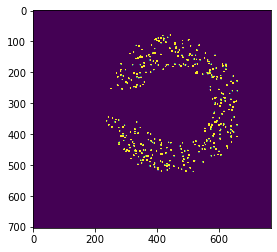

In [34]:

i=0
imgs_reconstruct = reconstruct_img(photons_i[i], photons_j[i], shape)



plt.figure()

plt.imshow(imgs_reconstruct,vmax=.01,vmin=0)

In [25]:
nframe

1691